In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [47]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Data Wranglinhg

In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def wrangle_data(filepath, missing_threshold=0.5):
    """
    Loads, cleans, and processes the dataset:
    - Removes constant and high-missing-value columns
    - Encodes categorical variables
    - Returns cleaned dataset and label encoders
    """
    df = pd.read_csv(filepath)

    # Drop constant columns
    nunique = df.nunique()
    cols_to_drop = nunique[nunique == 1].index.tolist()
    df.drop(columns=cols_to_drop, inplace=True)

    # Remove columns with >50% missing values
    missing_percentage = df.isnull().mean()
    cols_to_drop = missing_percentage[missing_percentage > missing_threshold].index.tolist()
    df.drop(columns=cols_to_drop, inplace=True)

    # Handle missing values
    for col in df.columns:
        if df[col].dtype == 'object':  # Categorical columns
            df[col] = df[col].fillna('Unknown')  # No inplace=True
        else:  # Numerical columns
            df[col] = df[col].fillna(df[col].median())  # No inplace=True

    # Encode categorical variables
    label_encoders = {}
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype(str)  # Convert mixed types to string
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # Store encoders for future use

    return df, label_encoders

# Load and clean dataset
file_path = r"C:\Users\hp\Documents\Assigmet\lahore_filtered.xls"
df, encoders = wrangle_data(file_path)

# Display dataset info
print(f"Dataset Shape After Cleaning: {df.shape}")


C:\Users\hp\AppData\Local\Temp\ipykernel_19600\1852614406.py:12: DtypeWarning: Columns (60,61,84,92,93,112,113,161,162,163,201,211,213,242,243) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Dataset Shape After Cleaning: (165548, 76)


#  Featrue Selection

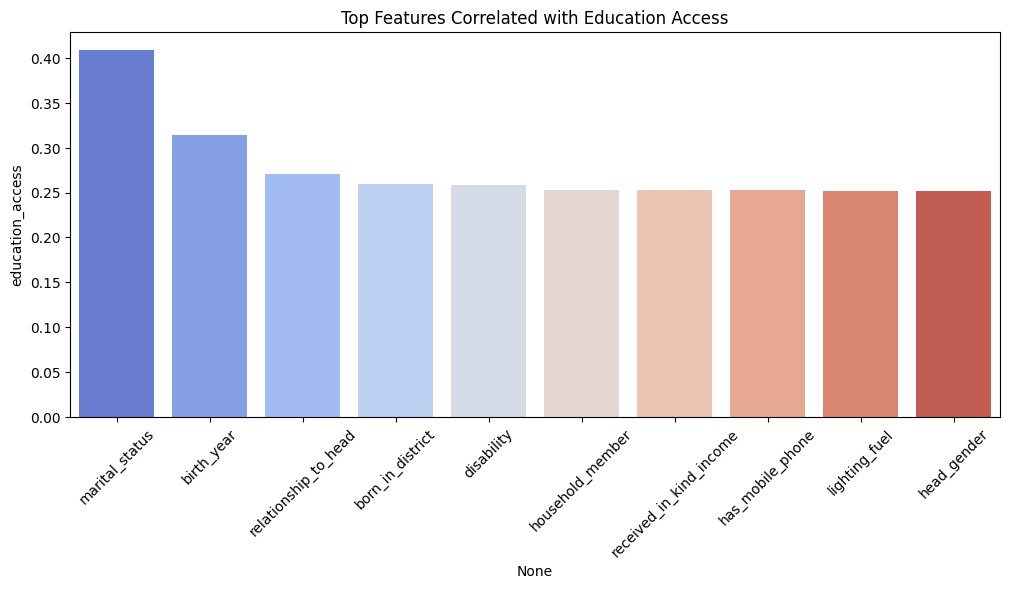

Top Features Selected: ['marital_status', 'birth_year', 'relationship_to_head', 'born_in_district', 'disability', 'household_member', 'received_in_kind_income', 'has_mobile_phone', 'lighting_fuel', 'head_gender']


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check correlation with education_access
correlation = df.corr()['education_access'].sort_values(ascending=False)

# Select top 10 correlated features (excluding target variable)
top_features = correlation.index[1:11]

# Visualize correlations
plt.figure(figsize=(12, 5))
sns.barplot(x=top_features, y=correlation[1:11], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top Features Correlated with Education Access")
plt.show()

print("Top Features Selected:", top_features.tolist())


# Data Split into Training and Testing

In [36]:

X_final = df[['marital_status', 'birth_year', 'relationship_to_head', 'born_in_district',
              'disability', 'household_member', 'received_in_kind_income', 'has_mobile_phone',
              'lighting_fuel', 'head_gender']]
y = df["education_access"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)



# Solving Data Class Imbalance Using Smote

In [56]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model again with balanced data
rf_model=model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_smote = model.predict(X_test)

# Evaluate again
print("Accuracy after SMOTE:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report After SMOTE:\n", classification_report(y_test, y_pred_smote))


Accuracy after SMOTE: 0.9458169737239505

Classification Report After SMOTE:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     30930
           1       0.55      0.99      0.71      2180

    accuracy                           0.95     33110
   macro avg       0.77      0.97      0.84     33110
weighted avg       0.97      0.95      0.95     33110



Feature Importance Scores:

                Feature  Importance
             birth_year    0.519996
         marital_status    0.263794
   relationship_to_head    0.118635
          lighting_fuel    0.027933
       born_in_district    0.023441
received_in_kind_income    0.019297
            head_gender    0.012159
       household_member    0.008326
       has_mobile_phone    0.004411
             disability    0.002010


C:\Users\hp\AppData\Local\Temp\ipykernel_19600\569471055.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="viridis")


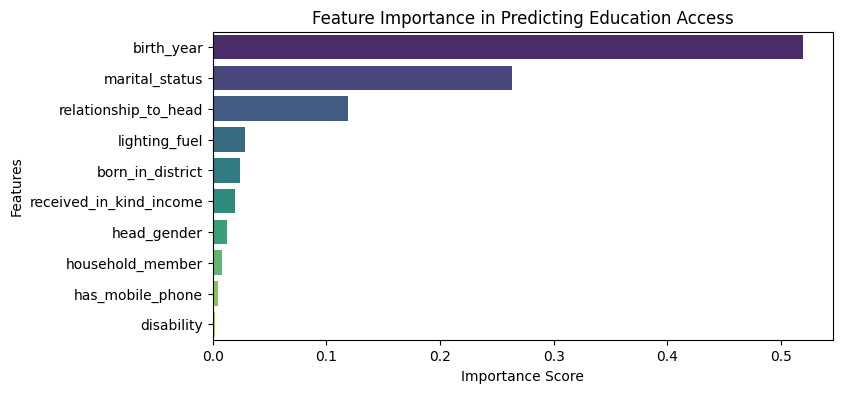

In [41]:
# Get feature importance as a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Print numerical values
print("Feature Importance Scores:\n")
print(feature_importance_df.to_string(index=False))  # To display all values clearly

# Plot feature importance
plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="viridis")
plt.title("Feature Importance in Predicting Education Access")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()



# getting individual feature importance using Permutaion

C:\Users\hp\AppData\Local\Temp\ipykernel_19600\3580615860.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perm_importance_df['Importance'], y=perm_importance_df['Feature'], palette="coolwarm")


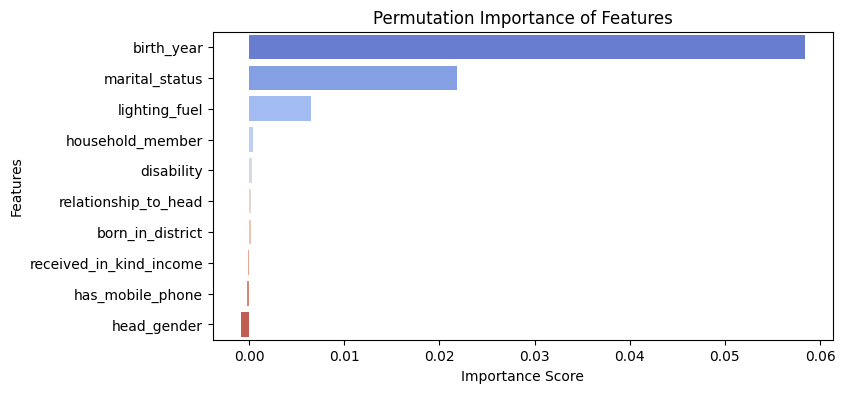

In [42]:
from sklearn.inspection import permutation_importance

# Get permutation importance
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

# Convert to DataFrame
perm_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# Plot permutation importance
plt.figure(figsize=(8, 4))
sns.barplot(x=perm_importance_df['Importance'], y=perm_importance_df['Feature'], palette="coolwarm")
plt.title("Permutation Importance of Features")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


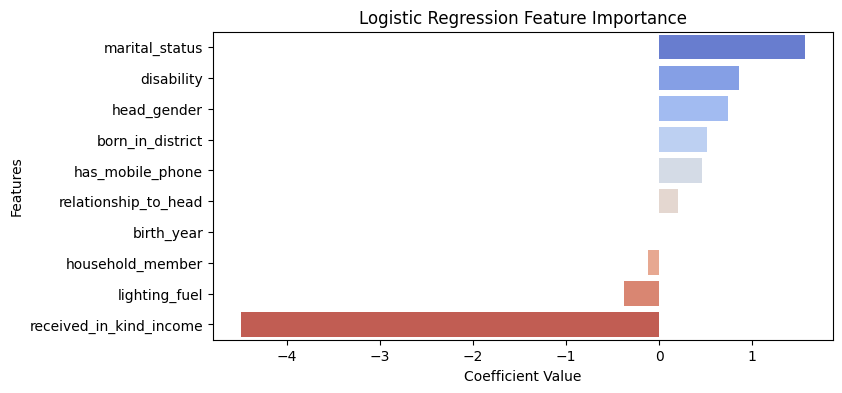

In [55]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=500, class_weight="balanced", random_state=42)
log_model=log_reg.fit(X_train, y_train)

# Get coefficients
feature_importance_logreg = pd.Series(log_reg.coef_[0], index=X_train.columns).sort_values(ascending=False)

# Plot coefficients
plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importance_logreg.values, y=feature_importance_logreg.index, palette="coolwarm")
plt.title("Logistic Regression Feature Importance")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.show()


# Making Predictions With Xgboost

In [57]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming you already have your final feature set (X_final) and target variable (y)
# For example, X_final is a DataFrame with the selected features and y is the 'education_access' column.

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Instantiate and train the XGBoost model
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
best_model=xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
# Get the probabilities for ROC AUC calculation (for the positive class)
y_probs = xgb_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", accuracy)

# Classification Report (includes precision, recall, and f1-score for each class)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score:", roc_auc)

# Feature Importance
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_importance_xgb)



XGBoost Accuracy: 0.9514648142555119

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97     30930
           1       0.59      0.83      0.69      2180

    accuracy                           0.95     33110
   macro avg       0.79      0.90      0.83     33110
weighted avg       0.96      0.95      0.96     33110

Confusion Matrix:
 [[29693  1237]
 [  370  1810]]
ROC AUC Score: 0.9771936334487167
birth_year                 0.912457
disability                 0.037075
born_in_district           0.011678
household_member           0.009408
has_mobile_phone           0.007271
lighting_fuel              0.007093
relationship_to_head       0.006754
head_gender                0.006420
received_in_kind_income    0.001406
marital_status             0.000440
dtype: float32


In [58]:
import pickle

# Save Random Forest model
with open('model_rf.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Save XGBoost model
with open('model_xgb.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save Logistic Regression model
with open('model_lr.pkl', 'wb') as f:
    pickle.dump(log_model, f)


In [60]:
import subprocess

def generate_requirements_freeze():
    """Generates requirements.txt using pip freeze."""
    with open("requirements.txt", "w") as f:
        subprocess.run(["pip", "freeze"], stdout=f)
    print("requirements.txt generated using pip freeze.")

if __name__ == "__main__":
    generate_requirements_freeze()


requirements.txt generated using pip freeze.
